<div class="alert alert-block alert-warning">
    <h1><center> DAKD 2024 EXERCISE 1: DATA UNDERSTANDING  </center></h1>

This exercise relates to the _data understanding_ and  _data preparation_ stages of the Crisp Data Mining (CRISP-DM) model presented on the course. The questions at this stage of a data-analysis project are for example:

- Is the data quality sufficient?
- How can we check the data for problems?
- How can we clean the data?
- How is the data best transformed for modeling?

It may be tempting to just run a model on data without checking it. However, not doing basic checks can ruin your whole analysis and make your results invalid as well as mislead you in further analyses. There is no excuse for not plotting and checking that the data is as we expect and clean. In this exercise we do just that, check the validity of data and familiarize ourselves with a dataset, also discussing preprocessing and multi-dimensional plotting.

------------

### <font color = red> *** FILL YOUR INFORMATION BELOW *** </font>
Arttu Kuitunen <br>
1500550 <br>
arasku@utu.fi  <br>
13.11.2024  <br>

#### General Guidance for Exercises

- **Complete all tasks**: Make sure to answer all questions, even if you cannot get your script to fully work.
- **Code clarity**: Write clear and readable code. Include comments to explain what your code does.
- **Effective visualizations**: Ensure all plots have labeled axes, legends, and captions. Your visualizations should clearly represent the underlying data.
- **Notebook organization**: You can add more code or markdown cells to improve the structure of your notebook as long as it maintains a logical flow.
- **Submission**: Submit both the `.ipynb` and `.html` or `.pdf` versions of your notebook. Before finalizing your notebook, use the "Restart & Run All" feature to ensure it runs correctly.

#### Grading Criteria
- The grading scale is **Fail/Pass/Pass with honors (+1)**.
  - To **pass**, you must complete the required parts <span style="color:red">[1-7]</span>.
  - To achieve **Pass with honors**, complete the bonus exercises.

#### Technical Issues
- **Initial troubleshooting**: If you encounter problems, start with an online search to find solutions, but do not simply copy and paste code. Understand any code you use and integrate it appropriately.
- **External sources**: Cite all external sources used, whether for code or explanations.
- **Help resources**: If problems persist, ask for help in the course discussion forum, at exercise sessions, or via email to the course assistants. </span>.

#### Use of AI and Large Language Models
- We **do not encourage** the use of AI tools like ChatGPT. If you use them, critically evaluate their outputs.
  - **Documentation**: Describe how you used the AI tools in your work, including your input and how the output was beneficial.

#### Time Management
- **Avoid last-minute work**: Do not leave your work until the last moment. No feedback will be available during weekends.

#### Additional Notes
- You can find the specific deadlines and session times for each assignment on the Moodle course page.
- Ensure all your answers are **concise**—typically a few sentences per question.
- Your `.ipynb` notebook is expected to be **run to completion**, meaning it should execute without errors when all cells are run in sequence.


### <font color = red> Packages needed for this exercise: </font>
- The exercise can be done without importing any extra packages, but you can import new ones but bear in mind that if you are importing many new packages, you may be complicating your answer.

In [121]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
import math

# This forces plots to be shown inline in the notebook
%matplotlib inline


<div class="alert alert-block alert-warning">
    <h1><center> PLOTTING TUTORIAL </center></h1>

This small explanation of the matplotlib package aims to avoid confusion and help you avoid common mistakes and frustration. Matplotlib is an object-oriented plotting package with the benefit of giving the user a lot of control. The downside is that it can be confusing to new users. **If you are having problems with the plotting exercises, return to this tutorial as it explains the needed concepts to do the exercises!**

-----------

###  Figure and axes


All plots in matplotlib are structured with the **<font color = dimgrey> figure </font>** and **<font color = blue> axes </font>** objects.

- The **<font color = dimgrey> figure </font>** object is a container for all plotting elements (in other words, everything we see).  
- A figure can have many **<font color = blue> axes </font>**. They are the objects you plot on to. The axes can be anywhere inside the figure and can even overlap. Position of axes is defined relative to the figure.

The **<font color = blue> axes </font>** objects have the methods you will use to define most of your plots. For example axes.hist() is used to draw a histogram and axes.set_title() to give one axes a title. The name of the object can be a bit confusing as it does not refer to the axes in the way "x-axis" does but to the container of a single plot.


--------------
     
- Below is an example that illustrates how **<font color = dimgrey> figures </font>**and **<font color = blue> axes </font>** work together in matplotlib. The comments explain what is done in every row of code. <font color = green> You are encouraged to play around with it, but its not required in terms of the exercise </font>. Below, we will create all figures and axes separately, but later on we will use a quicker way to do so.

 This is not yet a part of the exercises themselves and you do not need to change anything !

Text(3, 6, 'This is a text object relative to the inner axes')

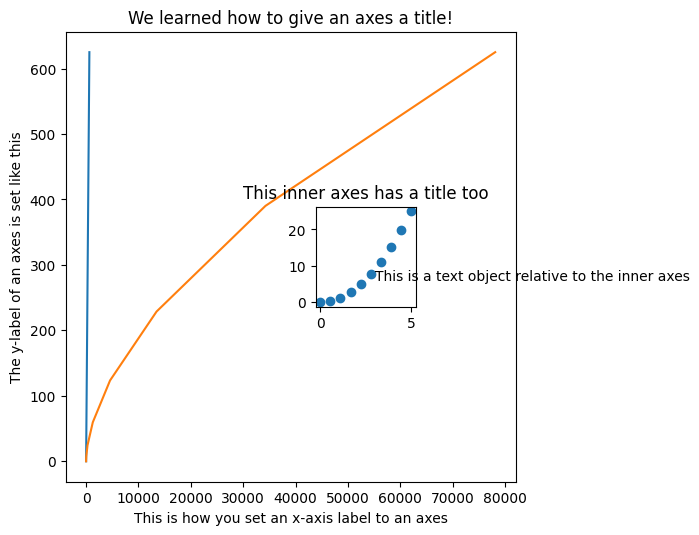

In [122]:
### --- Lets make some example data ---
x_example_data = np.linspace(0,5,10) # Generate 10 evenly spaced numbers between 0 and 5 for x data
y_example_data = x_example_data**2   # Square the x data to create the corresponding y data

### ---- Create a Figure ----
example_figure = plt.figure(figsize=(5, 5))  # You give the size of the figure as a tuple of inches

### ---- Create Outer Axes ----
'''
Create axes inside the figure. "e.g example_figure.add_axes(...)"  The list [0.1, 0.1, 0.9, 0.9] means :
  - The left side of the axes is 10% from the left of the figure
  - The bottom of the axes is 10% from the bottom of the figure
  - The axes take up 90% of the figure’s width and height
'''
example_axes_outer = example_figure.add_axes([0.1, 0.1, 0.9, 0.9]) 

### Set labels and titles for the outer axes ###
example_axes_outer.set_xlabel("This is how you set an x-axis label to an axes")
example_axes_outer.set_ylabel("The y-label of an axes is set like this")
example_axes_outer.set_title("We learned how to give an axes a title!")

### ---- Create Inner Axes ----
example_axes_inner = example_figure.add_axes([0.6, 0.45, 0.2, 0.2]) # Inner axes defined similarly [left, bottom, width, height]
example_axes_inner.set_title("This inner axes has a title too")

### ---- Plot Data and Customize ----
example_axes_inner.scatter(x_example_data, y_example_data)  # Scatter plot on inner axes

# you can add multiple things such as (lines) can be plotted on same outer axis.
example_axes_outer.plot(x_example_data**4, y_example_data**2)
example_axes_outer.plot(x_example_data**7, y_example_data**2)

### ---- Add Text Annotation ----
# If you want to add other objects, you add them to axes too, like text
# Now you specify the location relative to the parent axes
example_axes_inner.text(3, 6, "This is a text object relative to the inner axes")  # Text relative to the inner axes

### Subplots: Creating Multiple Axes in a Grid

A common way to start plotting in Matplotlib is to use the `plt.subplots()` function. This function automatically creates a figure and a specified number of axes (subplots) arranged in a grid, linking them to the figure. Even when creating just one subplot, `plt.subplots()` is often used as it offers flexibility and ease of management.

The most important arguments for `plt.subplots()` are:

- **nrows**: The number of rows of subplots in the grid.
- **ncols**: The number of columns of subplots in the grid.
- **figsize**: A tuple like `(6, 4)` that sets the figure size in inches. The first value is the width, and the second is the height.
- **sharex**: If `True`, all subplots share the same x-axis scale and ticks.
- **sharey**: If `True`, all subplots share the same y-axis scale and ticks.

#### Example:

Below is an example of how to create subplots. It includes a loop to fill the subplots using the `enumerate()` function, which provides an index that can be used to access individual subplot axes. This is a useful pattern when plotting multiple subplots programmatically.

The function `plt.tight_layout()` is also handy for arranging subplots. It automatically adjusts the positions of the axes to ensure they don't overlap, making the figure look cleaner and more readable.It should be called after the plot is finished.

In [123]:
# ----- Create some random data for the example -----
# We generate 3 sets of continuous numeric features and 3 sets of binary features

# Generate random continuous data (3 arrays, each with 10 samples of 2 numeric features)
numeric_datas = [np.random.rand(10, 2) for _ in range(3)]  # 3 arrays of 10x2 random floats between 0 and 1

# Generate binary data (3 arrays, each counting occurrences of 0s and 1s from random binary samples)
# np.random.randint creates random integers (0 or 1), np.unique counts them
binary_datas = [
    np.unique(np.random.randint(0, 2, size=10), return_counts=True)[1] 
    for _ in range(3)
]  # 3 arrays of counts of 0s and 1s (binary features)
# numeric_datas
binary_datas

[array([6, 4]), array([3, 7]), array([6, 4])]

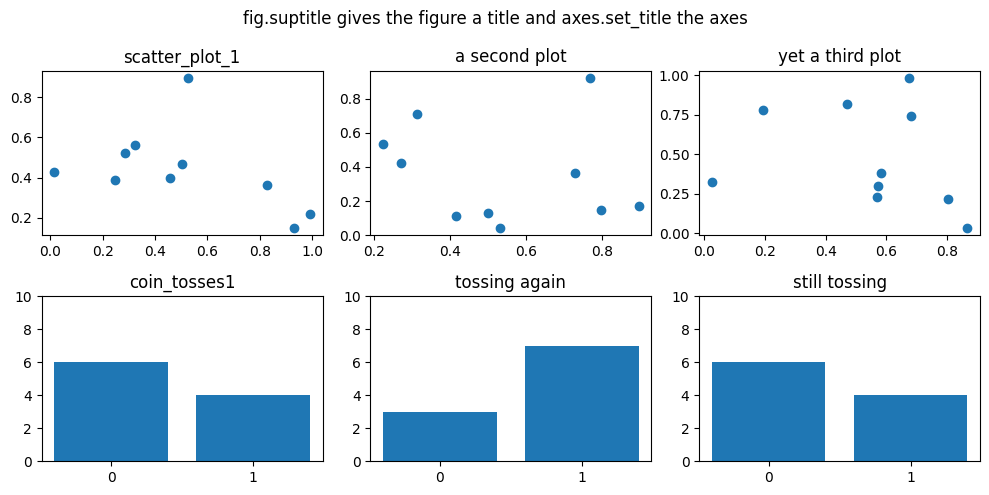

In [124]:
# Create figure with six axes in a 2*3 grid and set up titles --------------------------------------------------------
fig, axes = plt.subplots(2,3, figsize = (10,5)) # now axes have indexes like axes[i, j]
numeric_plot_titles = ['scatter_plot_1', 'a second plot', 'yet a third plot' ]#some titles for the different axes
binary_plot_titles = ['coin_tosses1', 'tossing again', 'still tossing' ]#some titles for the different axes


# Enumerate the index into the axes, fill the first 3 columns of first row with scatterplots of numeric_datas --------
i = 0 # for indexing to the row of the axes [**i**, j]
for j, numeric_data in enumerate(numeric_datas): # j = [0,1, ... n_datasets] for filling the columns, i stays constant as its the row
    axes[i, j].scatter(x = numeric_data[:, 0], y = numeric_data[:, 1]) #plots are called on the axes
    axes[i, j].set_title(numeric_plot_titles[j]) #set a title for each axes
plt.tight_layout()


# Plot the binary data -----------------------------------------------------------------------------------------------
i = 1 # second rowd
for j, binary_data in enumerate(binary_datas): # j = [0,1, ... n_datasets] for filling the columns, i stays constant as its the row
    axes[i, j].bar(x = ["0","1"], height = binary_data) #make a barplot
    axes[i, j].set_title(binary_plot_titles[j]) #set a title for each axes
    axes[i, j].set_ylim((0,10)) # set the yaxis limits, set_xlim works the same way.

fig.suptitle("fig.suptitle gives the figure a title and axes.set_title the axes")
plt.tight_layout()

#### <span style="color: maroon;">Seaborn and Matplotlib (new)</span>

Seaborn is a popular plotting library built on top of Matplotlib. It was designed to make creating statistical plots easier, more intuitive, and visually appealing with minimal effort. Seaborn is especially known for its default color palettes and built-in support for complex visualizations, making it faster to use compared to plain Matplotlib.

When working with Seaborn, it’s important to understand that there are two kinds of plotting functions:
- **Figure-level plots**: These functions manage the entire figure themselves (including creating the figure and subplots) and cannot be easily integrated into custom subplot grids. Examples include `sns.catplot()` and `sns.lmplot()`.
- **Axes-level plots**: These functions work on individual Matplotlib axes and can be combined with Matplotlib's `subplots()` to create complex, multi-plot figures. Examples include `sns.scatterplot()` and `sns.histplot()`.

For axes-level plots, you can pass a Matplotlib axes object to the Seaborn plotting function to specify where the plot should appear. This allows you to mix Matplotlib and Seaborn plots in the same figure. Below is an example of how to use Seaborn to plot on a specific set of axes.

If you'd like to dive deeper into the different types of Seaborn functions and when to use them, you can find more information in the [Seaborn function overview](https://seaborn.pydata.org/tutorial/function_overview.html).

<Axes: ylabel='Count'>

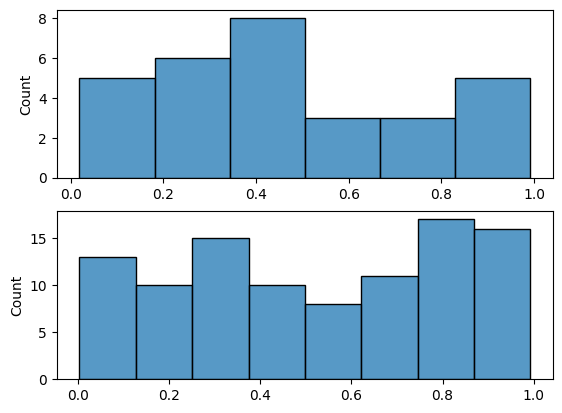

In [125]:
fig, axes = plt.subplots(2)

# make some data
random_data_a = np.random.rand(30)
random_data_b = np.random.rand(100)

# print the data we are plotting
sns.histplot(data = random_data_a, ax = axes[0]) # we make a seaborn plot and put it into one of the axes we created
sns.histplot(data =  random_data_b, ax = axes[1]) # we make a seaborn plot and put it into one of the axes we created


<div class="alert alert-block alert-warning">
    <h1><center> START OF EXERCISES </center></h1>

##  <font color = dimgrey> 1. Introduction to the dataset </font>

The dataset in this exercice contains comprehensive health information from  hospital patients with and without cardiovascular disease. The target variable "cardio," reflects the presence or absence of the disease, which is characterized by a buildup of fatty deposits inside the arteries (blood vessels) of the heart.

 -------
As is often the case with data analysis projects, the features/variables have been retrieved from different sources:
- doctors notes (texts)
- examination variables that have come from a database containing lab results or taken during a doctors examination
- self reported variables

--------------
The exercise data has the following columns/attributes:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in days
| gender | binary | Male/Female
| body_mass | numeric | Patient's measured weight, in kilograms (kg).
| height | numeric | Patient's measured height, in centimeters (cm).
| blood_pressure_high | numeric | Measured Systolic blood pressure
| blood_pressure_low | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| serum_lipid_level | categorical | Serum lipid / Cholesterol associated risk information evaluated by a doctor
|family_history| binary | Indicator for the presence of family history of cardiovascular disease based on medical records of patients
| cardio | binary | Whether or not the patient has been diagnosed with cardiac disease.

-----------
#### ***Reading data***

It is good practice to read the features in using their correct types instead of fixing them later. Below, there is ready-made code for you to read in the data, using the data types and column names listed in the above table. Don't change the name of the variable, _data_. It is important in later exercises (for example in ex. 5e) that this is the name of the variable. <font color = red> If you have the dataset in the same folder as this notebook, the path already given to you should work. </font>

---------------

In [126]:
 # --- READ IN DATA (no need to change) --------
data_path = "CardioCare_ex1.csv" #if you just give the name of the file it will look for the data in the same folder as your script
data = pd.read_csv(data_path, dtype = {'age': 'int', 'height': 'int', 'body_mass':'int', 'blood_pressure_low':'int', 'blood_pressure_high':'int', 'gender': 'boolean', 'smoke': 'boolean',
       'active':'boolean', 'cardio':'boolean', 'serum_lipid_level':'category', 'family_history':'boolean'}) #the main data you use in this exercise should have this variable name, so that code given for you further on will run.

---------
***Exercise 1 a)***
1. First, print out the first five rows of the data.

2. Then, save the feature names to lists by their types:
   - Create three lists named **numeric_features**, **binary_features**, and **categorical_features**. 
   - These lists should contain the **names** of the features based on their types:
     - Numeric features (e.g., `age`, `body_mass`, etc.)
     - Binary features (also known as boolean, e.g., `gender`, `smoke`, `cardio`, etc.)
     - Categorical features (e.g., `serum_lipid_level`)

---

#### Important Notes:

When working with DataFrames, it is often useful to organize column names into lists. This practice simplifies data manipulation and analysis. Once the feature names are organized, you can easily select, filter, or apply operations to specific groups of features. This also helps to avoid typing errors and reduces repetition.

For example, once you create your list of numeric features, you can select all columns containing numeric data with the following command:

```python
data[numeric_features]


In [127]:
# --- Your code here for 1 a) ---
data.head(5)
data.info()

numeric_features = data.columns[data.dtypes == 'int64'].tolist()
binary_features = data.columns[data.dtypes == 'boolean'].tolist()
categorical_features = data.columns[data.dtypes == 'category'].tolist()

numeric_features, binary_features, categorical_features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  210 non-null    int64   
 1   gender               210 non-null    boolean 
 2   height               210 non-null    int64   
 3   body_mass            210 non-null    int64   
 4   blood_pressure_high  210 non-null    int64   
 5   blood_pressure_low   210 non-null    int64   
 6   smoke                210 non-null    boolean 
 7   active               210 non-null    boolean 
 8   cardio               210 non-null    boolean 
 9   serum_lipid_level    210 non-null    category
 10  family_history       210 non-null    boolean 
dtypes: boolean(5), category(1), int64(5)
memory usage: 10.8 KB


(['age', 'height', 'body_mass', 'blood_pressure_high', 'blood_pressure_low'],
 ['gender', 'smoke', 'active', 'cardio', 'family_history'],
 ['serum_lipid_level'])

-----
In many data analysis projects, the data is often not collected specifically for analysis purposes. Instead, it may come from various sources or be collected for entirely different reasons. As a result, the data might not be well-formatted and could contain errors or inconsistencies. 

It might be tempting to immediately apply a model to the data "as is," but it is crucial to first **check the data for quality issues**. Ignoring potential data issues can lead to misleading conclusions, undermining the entire analysis. 

### Why Data Quality Checks Matter:

One standard routine to ensure data quality is:
1. **Calculate descriptive statistics** for each feature. This gives an overview of the distribution, range, and possible anomalies.
2. **Visualize the features** to check whether the values are realistic and within expected ranges.

This step helps identify outliers, incorrect data entries, or formatting issues, ensuring that your analysis is based on clean and reliable data.

---

### Descriptive Statistics and Data Types

It's important to note that certain descriptive statistics might not be meaningful for specific types of features. For instance, calculating the "mean" for binary or categorical features may not offer valuable insight. In **pandas** (as in many other data analysis packages), some functions behave differently depending on the data type of the column.

In the following exercises, we will explore:
- **Descriptive statistics** for the dataset.
- How the results and behavior of descriptive functions can vary based on the data type (e.g., numeric vs. categorical features).


----------
***Exercise 2 a)***  Print out the data types of your dataset below.

_Perhaps the most common data types in pandas (see https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) are **float**, **int**, **bool** and **category**._

In [128]:
# --- 2 a) Print the feature types of your dataset --- #
data.dtypes

age                       int64
gender                  boolean
height                    int64
body_mass                 int64
blood_pressure_high       int64
blood_pressure_low        int64
smoke                   boolean
active                  boolean
cardio                  boolean
serum_lipid_level      category
family_history          boolean
dtype: object

--------
***Exercise 2 b)*** Use the **DataFrame.describe() method** in the cell below on your data.   


In [129]:
# --- Your code for 2 b) --- #
data.describe()

,age,height,body_mass,blood_pressure_high,blood_pressure_low
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,164.180952,73.895238,127.857143,81.814286
std,2429.010199,7.534648,14.612326,17.508947,9.947652
min,14367.000000,142.000000,45.000000,90.000000,50.000000
25%,17635.750000,158.000000,64.000000,120.000000,80.000000
50%,19778.000000,164.000000,70.000000,120.000000,80.000000
75%,21230.500000,170.000000,81.000000,140.000000,90.000000
max,23565.000000,195.000000,125.000000,190.000000,120.000000


--------
***Exercise 2 c)*** Did you get all of the features statistics or not? What do you think happened?

<font color="green">DataFrame.describe() automatically ignores those that are not numerical, because most of the statistics provided are only applicable for numbers.</font>

----------
***Exercise 2 d)*** Calculate descriptives for the binary (boolean) features and the categorical feature <br>

_tip: in python, same type data structures can in many cases be concatenated using the + operator. If youre using the lists of names you created to subset, you can concatenate the two lists of feature names and use the resulting list to help you subset the dataframe_

In [130]:
# 2 d) Your code here #
bin_cat_features = binary_features + categorical_features
data[bin_cat_features].describe()


,gender,smoke,active,cardio,family_history,serum_lipid_level
count,210,210,210,210,210,210
unique,2,2,2,2,2,4
top,False,False,True,False,False,normal
freq,129,186,162,105,128,153


Now, we will explore **what happens if the data is read using the default settings** (i.e., without specifying the data types for the features). In this case, we are **not providing information about the data types (dtypes)** to `pd.read_csv`, meaning no additional arguments are passed when loading the data.

Run the cell below (you don't need to modify the code) and observe the output of the data that has been incorrectly read due to missing dtype information. Then, compare this output with the data you loaded earlier using the correct dtypes, and check the descriptive statistics.


In [131]:
# read in the dataset with no arguments
wrongly_read_data = pd.read_csv(data_path)

# calculate descriptives for the data that was wrongly read in.
wrongly_read_data.describe()



,age,gender,height,body_mass,blood_pressure_high,blood_pressure_low,smoke,active,cardio,family_history
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,0.385714,164.180952,73.895238,127.857143,81.814286,0.114286,0.771429,0.500000,0.390476
std,2429.010199,0.487927,7.534648,14.612326,17.508947,9.947652,0.318918,0.420916,0.501195,0.489023
min,14367.000000,0.000000,142.000000,45.000000,90.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,17635.750000,0.000000,158.000000,64.000000,120.000000,80.000000,0.000000,1.000000,0.000000,0.000000
50%,19778.000000,0.000000,164.000000,70.000000,120.000000,80.000000,0.000000,1.000000,0.500000,0.000000
75%,21230.500000,1.000000,170.000000,81.000000,140.000000,90.000000,0.000000,1.000000,1.000000,1.000000
max,23565.000000,1.000000,195.000000,125.000000,190.000000,120.000000,1.000000,1.000000,1.000000,1.000000



***Exercise 2 e)*** 
Based on the output above, can you identify what went wrong with the data presentation? Why was it important to correctly define the data types when loading the dataset?


<font color="green">Serum  lipid level is missing (from the described features) because it is of type object. All boolean values are described as integer, therefore showing descriptive measures of the values between 0 and 1</font>

-----------------------
## 3. Plotting numeric features
Descriptives don't really give a full or intuitive picture of the distribution of features. Next, we will make use of different plots to check the data quality.


----------
***Exercise 3 a)*** Plot histograms for the **numeric features** to visually inspect their distributions. (Refer to the tutorial if you need assistance with plotting.)


_tip: When using `plt.subplots()`, if you provide only one argument for the grid size (e.g., `plt.subplots(3)`), it will create a **one-dimensional grid**. You can then index this grid with a single index, making it easier to loop through and assign plots to each subplot.

---

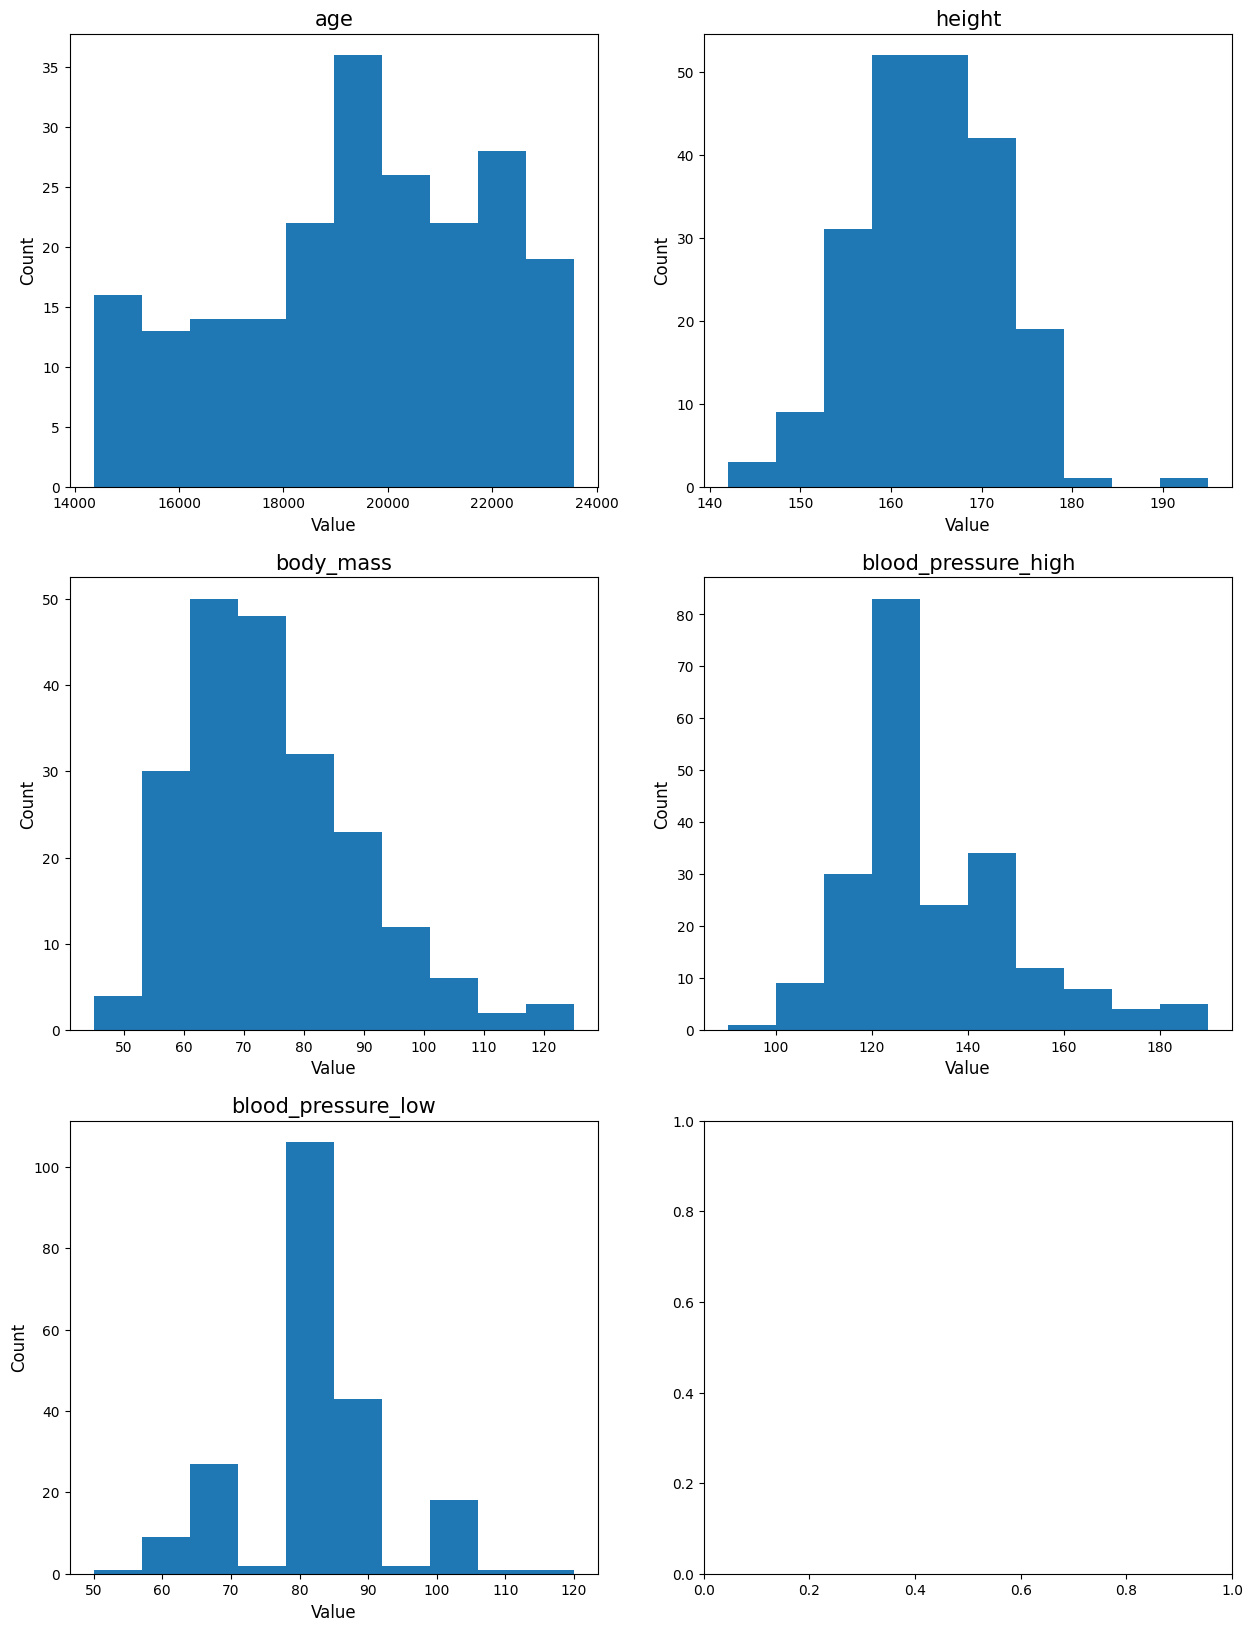

In [157]:
# --- Your code for 3 a) here --- #
# Using ceil() to calulate figure rows dynamically based on feature count
fig, axes = plt.subplots(math.ceil(len(numeric_features)/2), 2, figsize = (15, 20))

# Looping feature plots to 2 columns. Could still hide the empty plot. 
for j, feature in enumerate(numeric_features):
    row = j // 2
    col = j % 2
    axes[row, col].hist(data[feature], bins = 10)
    axes[row, col].set_title(feature, fontsize = 15)
    axes[row, col].set_xlabel("Value", fontsize = 12)
    axes[row, col].set_ylabel("Count", fontsize = 12)


_______
## 4. Plotting binary and categorical features

***Exercise 4 a)*** Plot **barplots** for each of the **non-numeric features** in the dataset. Make sure to **use fractions** instead of the actual frequencies of the categories.

 Tips:
- To create the barplots, refer to the documentation for `axes.bar`.
- To obtain the fractions of each category, use the `value_counts()` function with the `normalize` argument set to `True`. This will return the relative frequencies of each category (proportion of each category relative to the total).

**Note:** 

If you imported boolean features as `pandas` dtype `boolean`, you may find it easier to work with plotting libraries like `matplotlib` when these values are represented as numbers (`0` and `1`) instead of `True` and `False`.

If you encounter any errors while plotting, you can temporarily convert these boolean values to integers or floats using the `.astype()` method:

```python
# Example of converting boolean to int:
data['..'] = data['..'].astype(int)

In [14]:
### Your code for 4 a) here ###

**Exercise 4 b)** After reviewing the barplots above, Do you notice anything (unusual/irrelevant) with one of the features? If so, Let's try fix it.

If you have read the dtype of a categorical feature as `pandas` dtype `categorical`, you must also use the `remove_categories()` function to remove any unnecessary category levels.

To remove a specific category level, you can use the following example syntax:

```python
data['feature_name'] = data['feature_name'].cat.remove_categories("category name to delete")


<font color="green">Your answer for 4 b)</font>

In [15]:
### Your code for 4 b) here ###

-------------

## 5. Feature generation and exploration

Feature Engineering is a crucial step in the process of preparing data for most data analysis projects. It involves creating new features or modifying existing ones to improve the performance of predictive models. Feature engineering is a combination of domain knowledge, creativity, and data analysis, and it can have a significant impact on the success of a data analysis project.

--------------

**BMI**, or **Body Mass Index**, is a simple numerical measure that is commonly used to assess an individual's body weight in relation to their height. In our use case, BMI can be a useful indicator in the prediction of cardiovascular problems, as it could provide a well-established link between obesity and an increased risk of developing the disease.

\begin{align*}
\text{BMI} & = \frac{\text{Body mass (kg)}}{(\text{height (m)})^2} \\
\end{align*}

---------------------------------------
***Exercise 5 a)*** Generate a new feature called **BMI** using the provided formula that incorporates the **height** and **body_mass** features.


_tip: In this dataset, the **height** is recorded in centimeters. Before applying the formula, ensure that you convert the height from centimeters to meters by dividing by 100.

In [16]:
### Your code for 5 a) here ###

***Exercise 5 b)*** Using the previously calculated feature **BMI** generate a new feature named **BMI_category** that categorizes the values into groups, according to the standard BMI categories :

- Underweight: BMI less than 18.5
- Normal Weight: BMI between 18.5 and 24.9
- Overweight: BMI between 25 and 29.9
- Obese: BMI of 30 or greater

In [17]:
### Your code for 5 b) here ###

Now that we have our BMI values, it's a good practice to see if we can spot a hidden trend in our data.

***Exercise 5 c)*** Create a countplot to visualize the distribution of cardio (target variable) across different BMI categories.
Here, countplot refers to a type of bar plot that displays the frequency (count) of observations in each category of a categorical variable, visualizing the distribution of data by showing how many instances fall into each category.








In [18]:
### Your code for 5 c) here ###

***5 d)*** Can you notice any relationship or visible trend?

<font color="green">Your answer for 5 d)</font>

Below, there is ready-made code for you to appropriatly add the newly created features to the right column type list. You don't need to change anything about the code, just make sure that the names of the added features are as specified earlier (**BMI** and **BMI_category**)

In [ ]:
# ---- Add features to column type list (no need to change) --------
numeric_features.append("BMI")
data['BMI_category'] = data['BMI_category'].astype('category')
categorical_features.append("BMI_category")

-------------

## 6. Preprocessing numeric features

Scaling the data is a crucial step in the preprocessing phase of machine learning, as it can significantly improve algorithm performance. In many cases, if scaling is not applied, it may lead to poor performance. This is particularly true for distance-based algorithms covered in the course, such as PCA, t-SNE, KNN and Kmeans where features with larger values can dominate the distance calculations.

---

### Common Scaling Techniques:

In this exercise, we will explore two commonly used methods for scaling data:

1. **Min-Max Scaling to [0, 1]:** 
   - This technique rescales the feature values to a range between 0 and 1. It is particularly useful when you want to maintain the relationships between the values while fitting the data into a specific range. This method is often used in training neural networks, where matching the input range to the range of activation functions is important.

2. **Standardization :**
   - standardizing the features to 0 mean and unit variance. Standardizing values is very common in statistics.

### Available Functions:

To assist you in applying these scaling techniques, the following functions from the `sklearn` library have been imported for your use:

- `sklearn.preprocessing.minmax_scale`: For Min-Max Scaling.
- `sklearn.preprocessing.scale`: For Standardization.


**6 a)** Min-max numeric attributes to [0,1] and **store the results in a new dataframe called data_min_maxed**. You might have to wrap the data to a dataframe again using pd.DataFrame()

In [ ]:
# --- Your code for 6 a) here --- #

**Exercise 6 b)** Standardize the numeric attributes of the dataset to have a mean of 0 and a standard deviation of 1. Store the standardized results in a new DataFrame called `data_standardized`.

In [ ]:
# Your code for 6 b here --- #

**Exercise 6 c)** Create two boxplots for the 'age' feature: one using the `data_min_maxed` DataFrame and the other using the `data_standardized` DataFrame. Display the plots side-by-side and provide titles for each plot. See the tutorial in the beginning for help.

In [ ]:
# Your code for 6 c) here --- #

**Execise 6 d)** Describe what you would expect to see in these two boxplots. How would the characteristics of the boxplots differ for min-max scaled data and standardized data?

_tip: Consider factors like the location of the mean, and the range of values presented._

<font color="green">Your answer for 6 d)</font>

---------

Let's compare the effects of these preprocessing methods on a dataset with an outlier. We'll replace the last data point with an outlier (a value significantly different from the rest) and then apply min-max scaling and standardization. Finally, we'll visualize the results to observe how each method handles the outlier. The code to add the value is given for you and you shouldn't change it.

--------------------

***Exercise 6 e) Do the following:***
1. **Use the Provided Data:**
   - Start with the given data for the 'age' feature, which includes an outlier. This variable is referred to as `age_w_outlier`. The value of `age_w_outlier` is already set for you, so you don't need to modify it.

2. **Create Min-Max Scaled Variable:**
   - Use the `sklearn.preprocessing.minmax_scale` function to apply Min-Max scaling to `age_w_outlier`. Store the scaled values in a new variable named `age_w_outlier_minmaxed`.

3. **Create Standardized Variable:**
   - Use the `sklearn.preprocessing.scale` function to standardize the values of `age_w_outlier`. Store the standardized values in a new variable named `age_w_outlier_standardized`.


In [ ]:
### Add an outlier, DONT CHANGE THIS CELL CODE, JUST RUN IT ###
data_w_outlier = data.copy() #data should be the name of the variable where you have stored your data!
data_w_outlier.loc[data.shape[0] -1 , 'age'] = 150 #change the last value of age to be 150
age_w_outlier = data_w_outlier.age

In [ ]:
# --- Your code for 6 e) ---

***Below there is pre-written code for you to plot the different cases. Run it. The code should run if you have named your features appropriately. Run the code.***

In [ ]:
# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, min-maxed.
minmaxed_datas = pd.DataFrame({"minmaxed_age_no_outlier" : data_min_maxed.age,
              "minmaxed_age_with_outlier": age_w_outlier_minmaxed })

# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, standardized.
standardized_datas = pd.DataFrame({"standardized_data_no_outlier" : data_standardized.age,
              "standardized_data_w_outlier": age_w_outlier_standardized })

axes_minmaxed = minmaxed_datas[['minmaxed_age_no_outlier', 'minmaxed_age_with_outlier']].plot(kind='box', title='Minmax with and without outlier')
axes_std = standardized_datas[['standardized_data_no_outlier', 'standardized_data_w_outlier']].plot(kind='box', title='Standardized with and without outlier')

----------
**Exercise 6 f) Look at the output of the above cell and answer the following**:

1. Can you notice a difference between the two cases (min-maxed and standardized)?
2. Can you say something about the difference of the effect of min-maxing and standardization?


<font color="green">Your answer for 6 f)</font>

---------------
## 7. Preprocessing categorical features



We can roughly divide categorical variables/features to two types:  ***nominal categorical***  and  ***ordinal categorical*** variables/features. Some cases are clear in terms of which of the two a feature falls into. For example nationality is not an ordered feature, but which grade in school someone is has a natural ordering. **One-hot encoding** was presented in the lectures and will be used in the following exercises with different learning methods.


-----
***Nominal categorical features need to be encoded***, because not encoding them implies that they have an order. For example, consider a dataset where you would have rows by different countries, encoded randomly with numbers, for ex. Finland = 1, Norway = 2 and so on. For some analyses and methods this would imply that Norway is somehow "greater" in value than Finland. For some algorithms, the implication would also be, that some of the countries would be "closer" to each other.

------
***Ordinal categorical features do not necessarily need to be encoded***, but there are cases where it can be wise. One case is that the categories are not even distance from each other, which is the case with the 'serum_lipid_level' feature with the levels 'normal', 'elevated' and 'at risk'. Its not clear that these are equal in distance from each other. When unsure, it may also be better to one-hot encode, and a lot of packages do it for you behind the scenes. Here we decide to one-hot encode.  

---------------------


***Exercise 7 a)*** Apply One-hot-encode to the `serum_lipid_level` feature and add the resulting one-hot encoded features back to the DataFrame. Give the new features meaningful names. Print the first rows of the resulting dataframe.

_tip: pandas has a function for this, google!_

In [ ]:
# --- Your code for 7 a) here ---

----------

<div class="alert alert-block alert-warning">
    <h1><center> BONUS EXERCISES </center></h1>

- Below are the bonus exercises. You can stop here, and get the "pass" grade.
- By doing both of the bonus exercises below, you can get a "pass with honors", which means you will get one point bonus for the exam.

The following exercises are more challenging and not as straight-forward and may require some research of your own. However, perfect written answers are not required, but answers that show that you have tried to understand the problems and explain them with your own words.

____________
##  <font color = dollargreen > 8. BONUS: Dimensionality reduction and plotting with PCA </font>
In the lectures, PCA was introduced as a dimensionality reduction technique. Here we will use it to reduce the dimensionality of the numeric features of this dataset and use the resulting compressed view of the dataset to plot it. This means you have to, run PCA  and then project the data you used to fit the PCA to the new space, where the principal components are the axes.
____________

-------------
**Exercise 8 a)** Do PCA with two components with and without z-score standardization **for the numeric features in the data**.

In [ ]:
# --- Your for 8 a) code here --- #

-------------


**Exercise 8 b) Plot the data, projected on to the PCA space as a scatterplot, the x-axis being one component and y the other. **Add the total explained variance to your plot as an annotation**. See the documentation of the pca method on how to get the explained variance.

- _Tip: It may be easier to try the seaborn scatterplot for this one. For help see documentation on how to do annotation (see tutorial). The total explained variance is the sum of both the components explained variance_.

- _Tip2_: Depending on how you approach annotating the plot, you might have to cast the feature name to be a string. One nice way to format values in python is the f - formatting string, which allows you to insert expressions inside strings (see example below):



------
name = Valtteri<br>
print(f"hello_{name}")

---------
You can also set the number of wanted decimals for floats<br>
For example f'{float_variable:.2f}' would result in 2 decimals making it to the string created

----------

In [ ]:
# --- Your code for 8 b) --- you can make more cells if you like ---



**Exercise 8 c) Gather information for the next part of the exercise and print out the following things:**
- First, the standard deviation of the original data features (not standardized, and with the numeric features only).
- Second, the standard deviation of the standardized numeric features

In [ ]:
# --- Your code for 8 c) here --- #

----------
**Exercise 8 d) Look at the output above and the explained variance information you added as annotations to the plots. Try to think about the following questions and give a short answer of what you think has happened:**

1. Where do you think the difference between the amounts of explained variance might come from?

2. Can you say something about why it is important to scale the features for PCA by looking at the evidence youve gathered?

__Answer in your own words, here it is not important to get the perfect answer but to try to think and figure out what has happened__

------------

<font color="green">Your answer for 8 d)</font>

------------------

## <font color = dollargreen > 9. Bonus: t-SNE and high dimensional data </font>

Another method that can be used to plot high-dimensional data introduced in the lectures was t-distributed Stochastic Neighbor Embedding (t-SNE).

***Exercise 9 a)*** Run t-SNE for both standardized and non standardized data (as you did with PCA).

In [ ]:
# --- Your code for 9 a) here --- #

***Exercise 9 b)*** Plot t-sne, similarly to PCA making the color of the points correspond to the levels of the cardio feature, but having only numerical features as a basis of the T-SNE.  

In [ ]:
# --- Code for 9 b) --- #

***Exercise 9 c)***

- What do you think might have happened between the two runs of t-SNE on unstandardized and standardized data? Why is it important to standardize before using the algorithm?

_Here the aim is to think about this and learn, not come up with a perfect explanation. Googling is encouraged. Think about whether t-sne is a distance based algorithm or not?_

<font color="green">Your answer for 9 c)</font>